# Task C : Understanding Animation Movies Popularity and Sales

First, we import useful visualisation and data management librairies, and we load the dataset :

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [377]:
df=pd.read_csv("Animation_Movies.csv")

## 1. Boxplot representing the distribution of animation movies' durations in minutes by country of production

C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\679350496.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\679350496.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()


Text(0, 0.5, 'Duration in minutes')

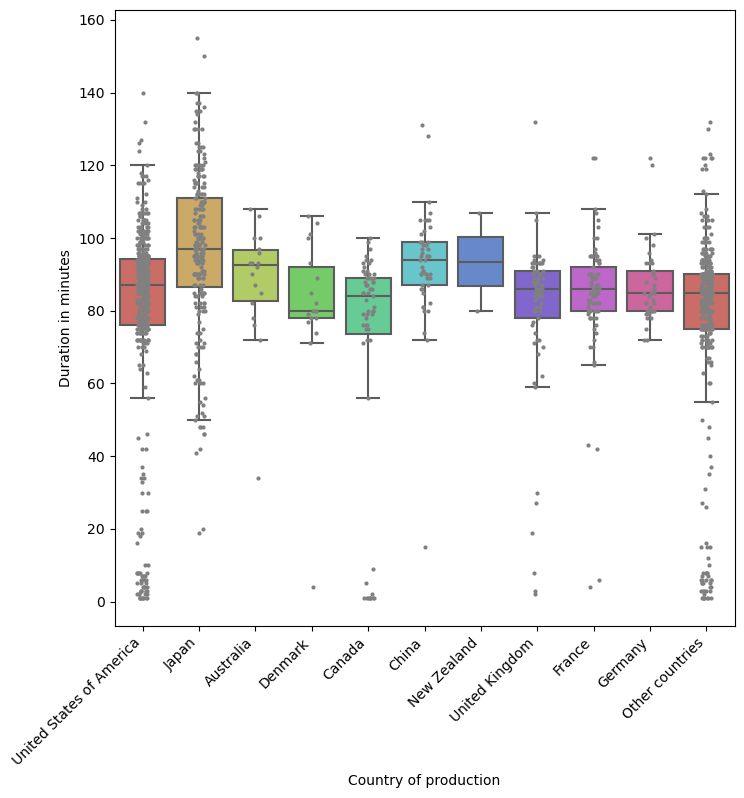

In [384]:
plt.figure(figsize=(8, 8))
metric_top="revenue"
metric_y="runtime"
category_type="production_countries" #"spoken_languages"
nb_countries=10

df_loc=df[(df["revenue"]!=0)&(df["runtime"]!=0)]
df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
df_loc=df_loc.explode("category_split")

df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()
list_top_countries=list(df_top_countries["category_split"].values)

def aux (country):
    if country in list_top_countries:
        return(country)
    else:
        return("Other countries")
    
df_loc["simplified_country"]=df_loc["category_split"].apply(aux)
ax =sns.boxplot(x="simplified_country", y=metric_y, data=df_loc,palette=sns.color_palette("hls",n_colors=nb_countries),showfliers=False)
sns.stripplot(x="simplified_country", y=metric_y, data=df_loc,s=3,color="grey")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# ax.set_yscale("log")
plt.xlabel("Country of production")
plt.ylabel("Duration in minutes")


## 2. Boxplot representing the distribution of animation movies' durations in minutes by their original language

C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\3689097940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\3689097940.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()


Text(0, 0.5, 'Duration in minutes')

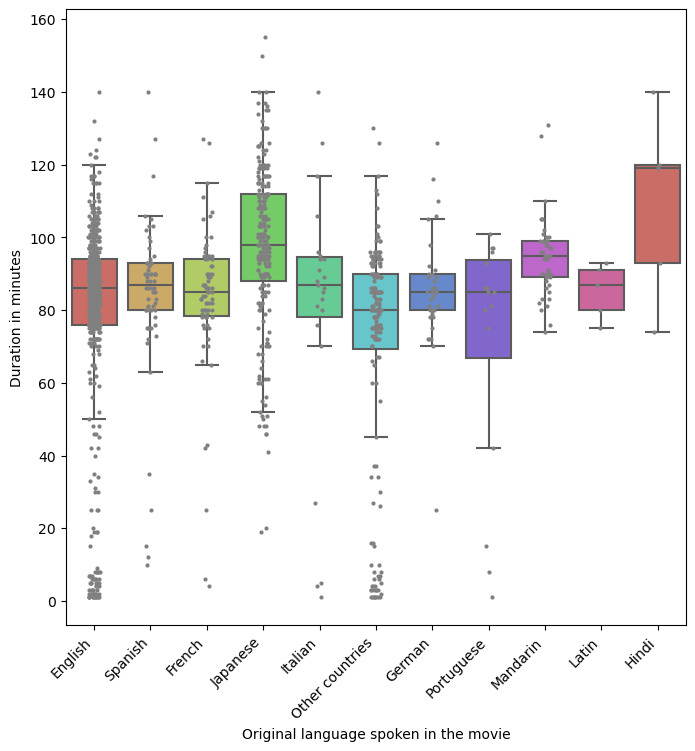

In [385]:
plt.figure(figsize=(8, 8))
metric_top="revenue"
metric_y="runtime"
category_type="spoken_languages"
nb_countries=10

df_loc=df[(df["revenue"]!=0)&(df["runtime"]!=0)]
df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
df_loc=df_loc.explode("category_split")

df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()
list_top_countries=list(df_top_countries["category_split"].values)



def aux (country):
    if country in list_top_countries:
        return(country)
    else:
        return("Other countries")
    
df_loc["simplified_language"]=df_loc["category_split"].apply(aux)
ax =sns.boxplot(x="simplified_language", y=metric_y, data=df_loc,palette=sns.color_palette("hls",n_colors=nb_countries),showfliers=False)
sns.stripplot(x="simplified_language", y=metric_y, data=df_loc,s=3,color="grey")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Original language spoken in the movie")
plt.ylabel("Duration in minutes")

## 3. Scatter plot of the revenue's logarithm in function of the budget's logarithm by country of production

C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\4097761317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\4097761317.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()
C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\4097761317.py:32: UserWarning: The palette list has more 

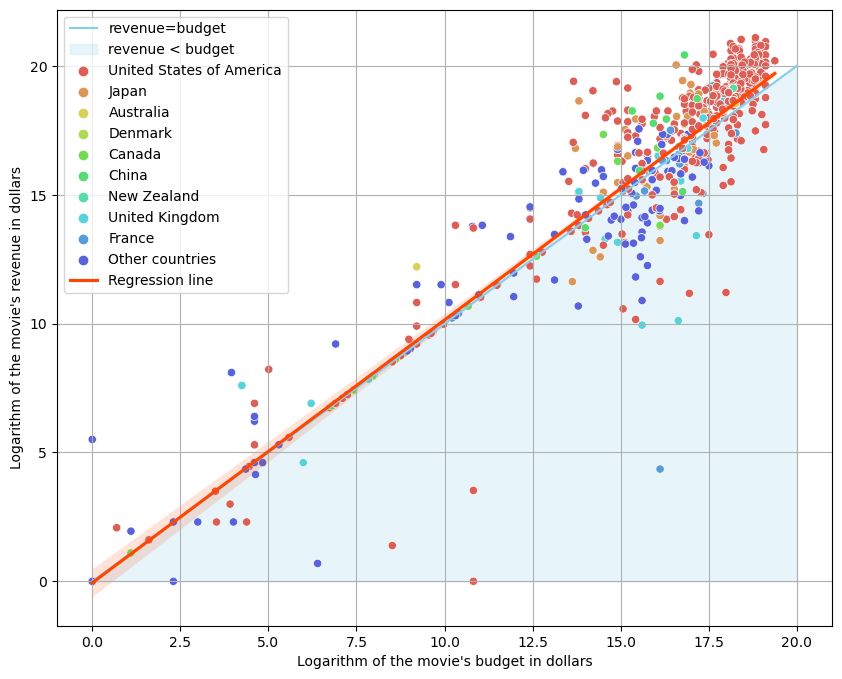

In [387]:
metric_top="revenue"
metric_y="runtime"
category_type="production_countries" #"spoken_languages"
nb_countries=10

df_loc=df[(df["budget"]!=0)&(df["revenue"]!=0)]
df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
df_loc=df_loc.explode("category_split")

df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()
list_top_countries=list(df_top_countries["category_split"].values)

def aux (country):
    if country in list_top_countries:
        return(country)
    else:
        return("Other countries")
    
df_loc["simplified_country"]=df_loc["category_split"].apply(aux)
df_loc=df_loc[df_loc["simplified_country"]!="nan"]
df_log=df_loc.copy()
df_log["budget"]=df_log["budget"].apply(np.log)
df_log["revenue"]=df_log["revenue"].apply(np.log)
plt.figure(figsize=(10,8))
x = np.linspace(0, 20, 100)
y = x
## 2. Boxplot representing the distribution of animation movies' durations in minutes by their original language
# Plot the function
plt.plot(x, y, label='revenue=budget',c="skyblue")
plt.fill_between(x,  y, color='skyblue', alpha=0.2, label='revenue < budget')

ax=sns.scatterplot(df_log[~df_log["simplified_country"].isna()],x="budget",y="revenue",hue="simplified_country",palette=sns.color_palette("hls",n_colors=14))

sns.regplot(df_log,x="budget",y="revenue", scatter=False,ax=ax,label="Regression line",color="orangered")
plt.xlabel("Logarithm of the movie's budget in dollars")
plt.ylabel("Logarithm of the movie's revenue in dollars")
plt.grid()
plt.legend()


## 4. Violin plot representing the distribution of ratings of the most popular animation movies' genres

For this chart, movies belonging to the "Animation" genre was replaced by "Not precised", given that this value does give any information on the genre of movie.

C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\2052415922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\2052415922.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are 

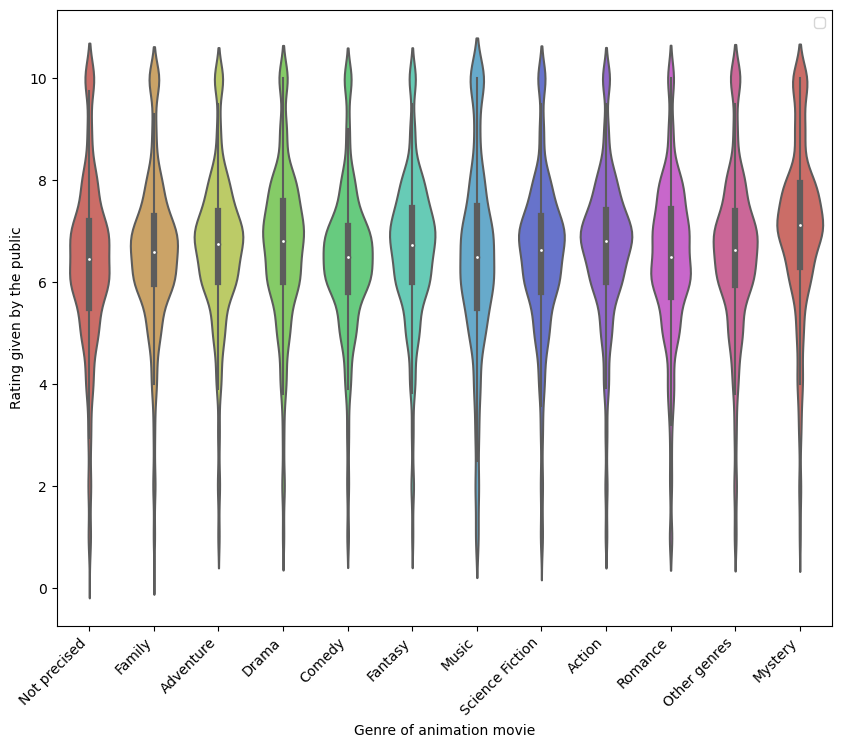

In [388]:
plt.figure(figsize=(10,8))
metric_top="vote_count"
metric_y="vote_average"
category_type="genres" #"spoken_languages"
nb_countries=11

df_loc=df[(df["vote_count"]!=0)&(df["vote_average"]!=0)]
df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", ")),axis=1)
df_loc=df_loc.explode("category_split")

def f (x):
    if x=="Animation":
        return("Not precised")
    else:
        return(x)
df_loc["category_split"]=df_loc["category_split"].apply(f)

df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()
list_top_countries=list(df_top_countries["category_split"].values)

def aux (country):
    if country in list_top_countries and country !="Animation":
        return(country)
    else:
        return("Other genres")
    
df_loc["simplified_genre"]=df_loc["category_split"].apply(aux)
ax =sns.violinplot(x="simplified_genre", y=metric_y, data=df_loc,palette=sns.color_palette("hls",n_colors=nb_countries),bw=0.2)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Genre of animation movie")
plt.ylabel("Rating given by the public")
plt.legend()

## 5. Stacked area chart representing the revenue in dollars generated by genre of animation movie over time

For this chart, movies belonging to the "Animation" genre were remover, given that this value does give any information on the genre of movie.

C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\3659015119.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc["year"]=df_loc["release_date"].apply(lambda x : int(str(x)[:4]))
C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\3659015119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", "))[0],axis=1)
C:\Users\rapha\AppData\Local\Temp\ipykernel_41520\3659015119.py:12: FutureWarning: The default value of numeric_o

(1980.0, 2024.0)

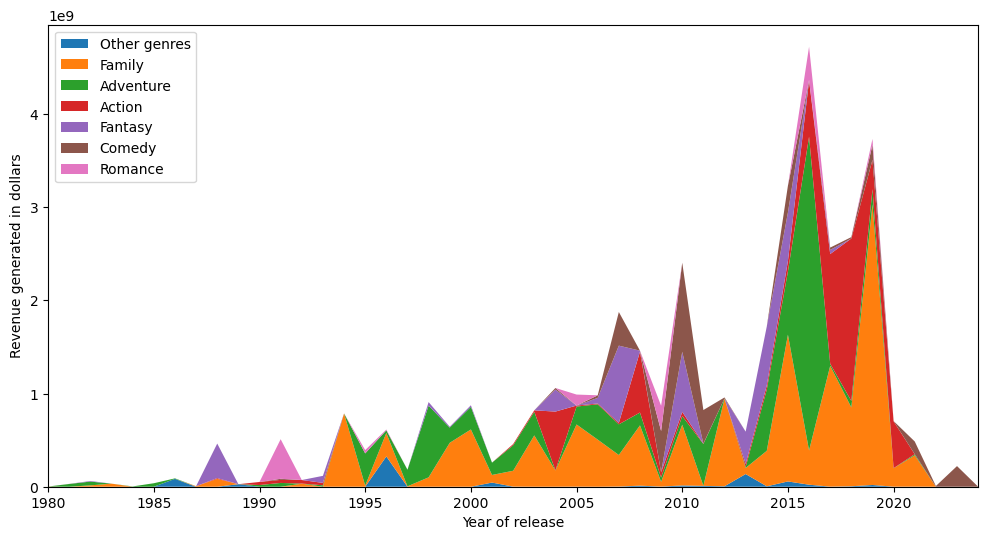

In [389]:
plt.figure(figsize=(12,6))
metric_top="revenue"
metric_y="revenue"
category_type="genres" #"spoken_languages"
nb_countries=7

df_loc=df[(df["revenue"]!=0)&(~df["release_date"].isna())]

df_loc["year"]=df_loc["release_date"].apply(lambda x : int(str(x)[:4]))
df_loc["category_split"]=df_loc.apply(lambda x : list(str(x[category_type]).split(", "))[0],axis=1)

df_top_countries=df_loc.groupby("category_split").agg("sum").sort_values(by=metric_top,ascending=False)[:nb_countries].reset_index()
list_top_countries=list(df_top_countries["category_split"].values)


def aux (country):
    if country in list_top_countries:
        return(country)
    else:
        return("Other genres")
    
df_loc["simplified_genre"]=df_loc["category_split"].apply(aux)
df_loc=df_loc.groupby(["year","simplified_genre"]).agg("sum").reset_index()

df_reduced=df_loc[["year","revenue","simplified_genre"]]
complete_df = pd.DataFrame([(year, genre) for year in range(min(df_reduced["year"]),max(df_reduced["year"]+1)) for genre in list_top_countries+["Other genres"]] , columns=['year', 'simplified_genre'])
final_df = pd.merge(complete_df, df_reduced, on=['year', 'simplified_genre'], how='left').fillna(0)
final_df

x=range(1918,2025)
list_genres=["Other genres"]+list_top_countries[1:]

y=[]
for genre in list_genres:

    y.append(list(final_df[final_df["simplified_genre"]==genre].sort_values("year")["revenue"]))
 
plt.xlabel("Year of release")
plt.ylabel("Revenue generated in dollars")

plt.stackplot(x,y, labels=list_genres)
plt.legend(loc='upper left')
plt.xlim(left=1980,right=2024)

